In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv('/content/DDW_B06_3300_State_TAMIL_NADU-2011.csv')

In [5]:
df.head(10)

,Table Code,State Code,District Code,Area Name,Total/ Rural/ Urban,Age group,Worked for 3 months or more but less than 6 months - Persons,Worked for 3 months or more but less than 6 months - Males,Worked for 3 months or more but less than 6 months - Females,Worked for less than 3 months - Persons,...,Industrial Category - N to O - Females,Industrial Category - P to Q - Persons,Industrial Category - P to Q - Males,Industrial Category - P to Q - Females,Industrial Category - R to U - HHI - Persons,Industrial Category - R to U - HHI - Males,Industrial Category - R to U - HHI - Females,Industrial Category - R to U - Non HHI - Persons,Industrial Category - R to U - Non HHI - Males,Industrial Category - R to U - Non HHI - Females
0,B0706,`33,`000,State - TAMIL NADU,Total,Total,4218884,2136881,2082003,723891,...,14495,58788,19892,38896,89703,21366,68337,625350,274811,350539
1,B0706,`33,`000,State - TAMIL NADU,Total,`5-9,48238,24511,23727,2051,...,20,312,169,143,842,386,456,40358,20664,19694
2,B0706,`33,`000,State - TAMIL NADU,Total,`10-14,76288,39191,37097,6993,...,44,506,256,250,1523,576,947,53900,27501,26399
3,B0706,`33,`000,State - TAMIL NADU,Total,15-19,257605,141262,116343,41938,...,768,2114,695,1419,5349,2065,3284,89780,46737,43043
4,B0706,`33,`000,State - TAMIL NADU,Total,20-24,478082,257149,220933,81036,...,2267,11529,2861,8668,10653,2478,8175,109641,54832,54809
5,B0706,`33,`000,State - TAMIL NADU,Total,25-29,554851,283442,271409,91694,...,2285,12528,4506,8022,12713,2745,9968,80299,34058,46241
6,B0706,`33,`000,State - TAMIL NADU,Total,30-34,483456,240046,243410,79385,...,2034,8540,3168,5372,10524,2074,8450,50655,17485,33170
7,B0706,`33,`000,State - TAMIL NADU,Total,35-39,502791,230695,272096,84066,...,2032,6614,2117,4497,10648,1864,8784,42115,12686,29429
8,B0706,`33,`000,State - TAMIL NADU,Total,40-49,824271,399353,424918,137834,...,2665,9406,3104,6302,16570,3453,13117,62345,19934,42411
9,B0706,`33,`000,State - TAMIL NADU,Total,50-59,539168,269939,269229,96980,...,1604,5124,1890,3234,10629,2480,8149,43638,15515,28123


In [6]:
df.shape

(1386, 69)

In [7]:
df.columns


Index(['Table Code', 'State Code', 'District Code', 'Area Name',
       'Total/ Rural/ Urban', 'Age group',
       'Worked for 3 months or more but less than 6 months -  Persons',
       'Worked for 3 months or more but less than 6 months - Males',
       'Worked for 3 months or more but less than 6 months - Females',
       'Worked for less than 3 months - Persons',
       'Worked for less than 3 months - Males',
       'Worked for less than 3 months - Females',
       'Industrial Category - A - Cultivators - Persons',
       'Industrial Category - A - Cultivators - Males',
       'Industrial Category - A - Cultivators - Females',
       'Industrial Category - A - Agricultural labourers - Persons',
       'Industrial Category - A - Agricultural labourers - Males',
       'Industrial Category - A - Agricultural labourers - Females',
       'Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Persons',
       'Industrial Category - A - Pla

In [8]:
df.describe

<bound method NDFrame.describe of      Table Code State Code District Code            Area Name  \
0         B0706        `33          `000   State - TAMIL NADU   
1         B0706        `33          `000   State - TAMIL NADU   
2         B0706        `33          `000   State - TAMIL NADU   
3         B0706        `33          `000   State - TAMIL NADU   
4         B0706        `33          `000   State - TAMIL NADU   
...         ...        ...           ...                  ...   
1381      B0706        `33          `633  District - Tiruppur   
1382      B0706        `33          `633  District - Tiruppur   
1383      B0706        `33          `633  District - Tiruppur   
1384      B0706        `33          `633  District - Tiruppur   
1385      B0706        `33          `633  District - Tiruppur   

     Total/ Rural/ Urban       Age group  \
0                  Total           Total   
1                  Total            `5-9   
2                  Total          `10-14   
3        

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 69 columns):
 #   Column                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                       --------------  ----- 
 0   Table Code                                                                                                   1386 non-null   object
 1   State Code                                                                                                   1386 non-null   object
 2   District Code                                                                                                1386 non-null   object
 3   Area Name                                                                                                    1386 non-null   object
 4   Total/ Rural/ Urban                                               

In [10]:
df.isnull().sum()

Table Code                                          0
State Code                                          0
District Code                                       0
Area Name                                           0
Total/ Rural/ Urban                                 0
                                                   ..
Industrial Category - R to U - HHI - Males          0
Industrial Category - R to U - HHI - Females        0
Industrial Category - R to U - Non HHI - Persons    0
Industrial Category - R to U - Non HHI - Males      0
Industrial Category - R to U - Non HHI - Females    0
Length: 69, dtype: int64

In [11]:
print(df.corr())

                                                    Worked for 3 months or more but less than 6 months -  Persons  \
Worked for 3 months or more but less than 6 mon...                                           1.000000               
Worked for 3 months or more but less than 6 mon...                                           0.998829               
Worked for 3 months or more but less than 6 mon...                                           0.998825               
Worked for less than 3 months - Persons                                                      0.999108               
Worked for less than 3 months - Males                                                        0.994988               
...                                                                                               ...               
Industrial Category - R to U - HHI - Males                                                   0.990432               
Industrial Category - R to U - HHI - Females                    

<ipython-input-11-23236a4e6045>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


<ipython-input-12-f044f2f5ad42>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


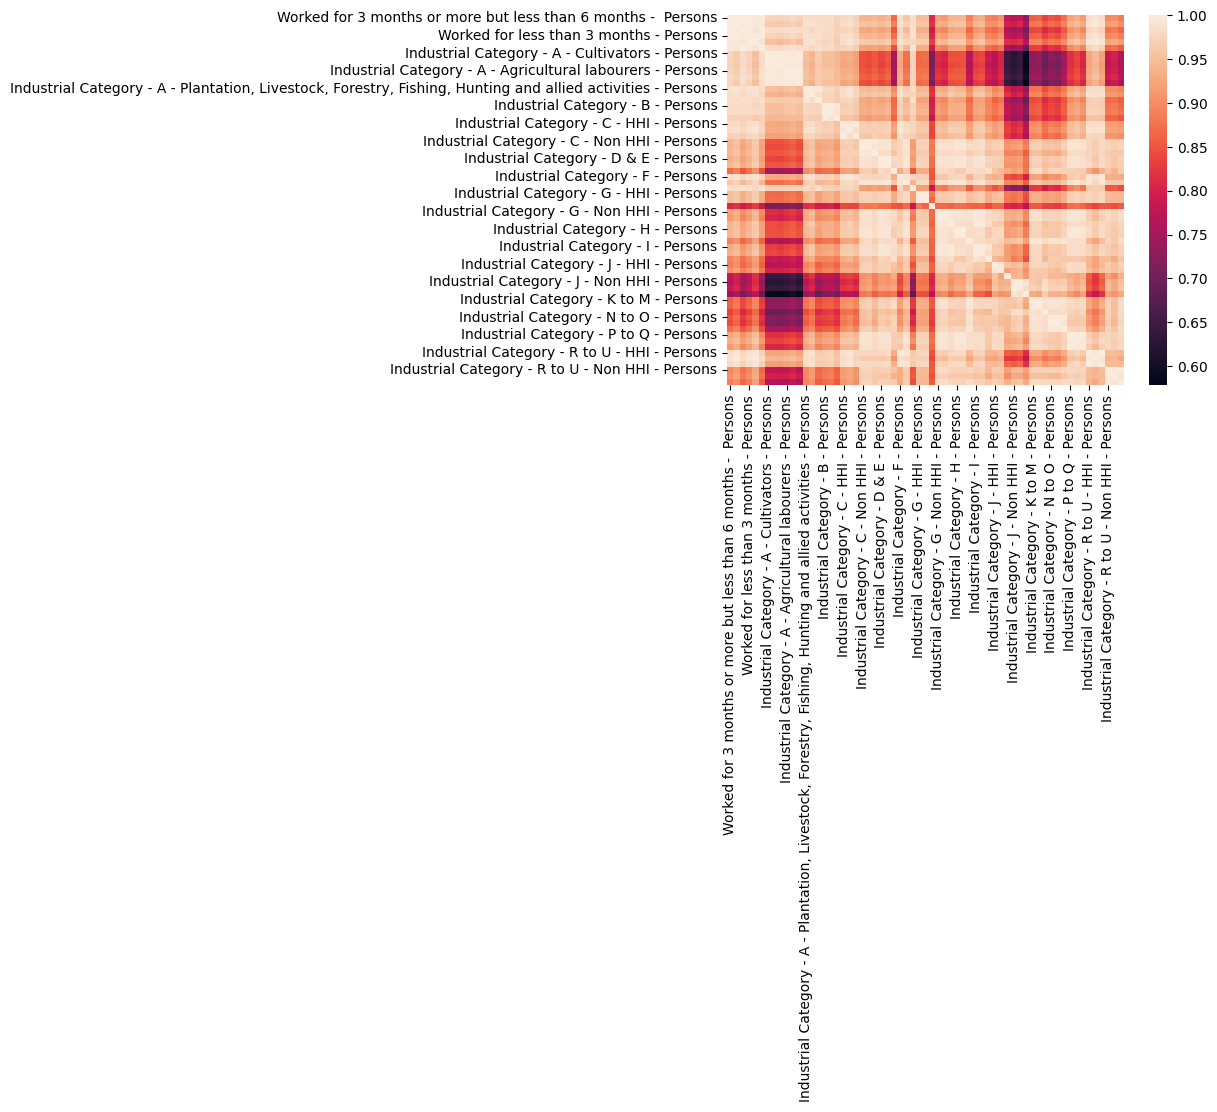

In [12]:
sns.heatmap(df.corr());

In [13]:
colmns = df.select_dtypes(include='int').columns.tolist()

In [14]:
colmns

['Worked for 3 months or more but less than 6 months -  Persons',
 'Worked for 3 months or more but less than 6 months - Males',
 'Worked for 3 months or more but less than 6 months - Females',
 'Worked for less than 3 months - Persons',
 'Worked for less than 3 months - Males',
 'Worked for less than 3 months - Females',
 'Industrial Category - A - Cultivators - Persons',
 'Industrial Category - A - Cultivators - Males',
 'Industrial Category - A - Cultivators - Females',
 'Industrial Category - A - Agricultural labourers - Persons',
 'Industrial Category - A - Agricultural labourers - Males',
 'Industrial Category - A - Agricultural labourers - Females',
 'Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Persons',
 'Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Males',
 'Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Females',
 

In [15]:
threshold = 1
# Calculate the mean of the column
mean_value = df['Worked for 3 months or more but less than 6 months -  Persons'].mean()
# Replace values greater than the threshold with the mean
df['Worked for 3 months or more but less than 6 months -  Persons'] = df['Worked for 3 months or more but less than 6 months -  Persons'].apply(lambda x: mean_value if x > threshold else x)


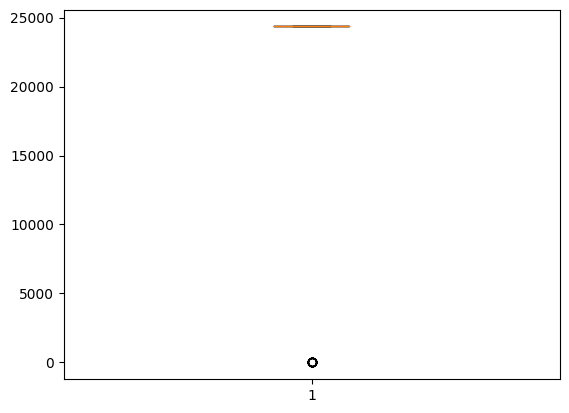

In [16]:
plt.boxplot(df['Worked for 3 months or more but less than 6 months -  Persons'])
plt.show()

In [17]:
threshold = 1
# Calculate the mean of the column
mean_value = df['Worked for 3 months or more but less than 6 months - Males'].mean()
# Replace values greater than the threshold with the mean
df['Worked for 3 months or more but less than 6 months - Males'] = df['Worked for 3 months or more but less than 6 months - Males'].apply(lambda x: mean_value if x > threshold else x)

In [19]:
threshold = 1
# Calculate the mean of the column
mean_value = df['Worked for 3 months or more but less than 6 months - Females'].mean()
# Replace values greater than the threshold with the mean
df['Worked for 3 months or more but less than 6 months - Females'] = df['Worked for 3 months or more but less than 6 months - Females'].apply(lambda x: mean_value if x > threshold else x)

In [21]:
threshold = 1
# Calculate the mean of the column
mean_value = df['Industrial Category - A - Cultivators - Persons'].mean()
# Replace values greater than the threshold with the mean
df['Industrial Category - A - Cultivators - Persons'] = df['Industrial Category - A - Cultivators - Persons'].apply(lambda x: mean_value if x > threshold else x)

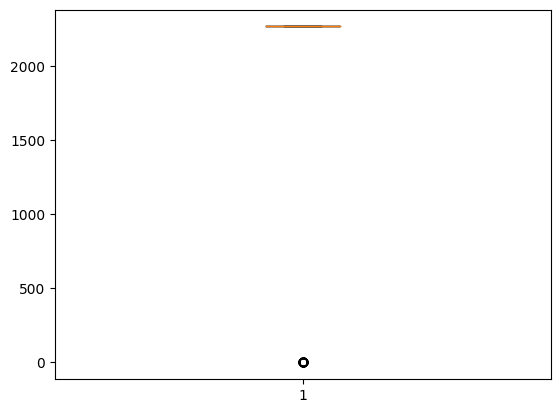

In [22]:
plt.boxplot(df['Industrial Category - A - Cultivators - Persons'])
plt.show()

In [23]:
threshold = 1
# Calculate the mean of the column
mean_value = df['Industrial Category - A - Cultivators - Males'].mean()
# Replace values greater than the threshold with the mean
df['Industrial Category - A - Cultivators - Males'] = df['Industrial Category - A - Cultivators - Males'].apply(lambda x: mean_value if x > threshold else x)

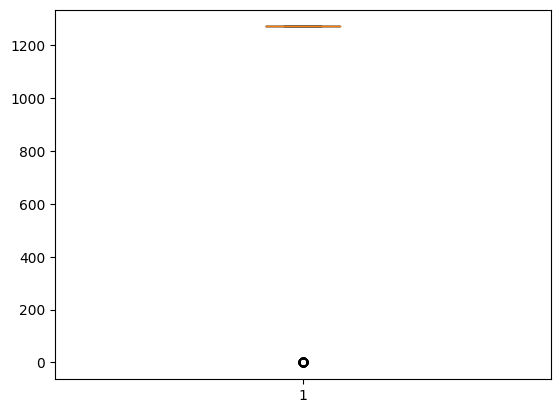

In [24]:
plt.boxplot(df['Industrial Category - A - Cultivators - Males'])
plt.show()

In [25]:

threshold = 1
# Calculate the mean of the column
mean_value = df['Industrial Category - A - Cultivators - Females'].mean()
# Replace values greater than the threshold with the mean
df['Industrial Category - A - Cultivators - Females'] = df['Industrial Category - A - Cultivators - Females'].apply(lambda x: mean_value if x > threshold else x)

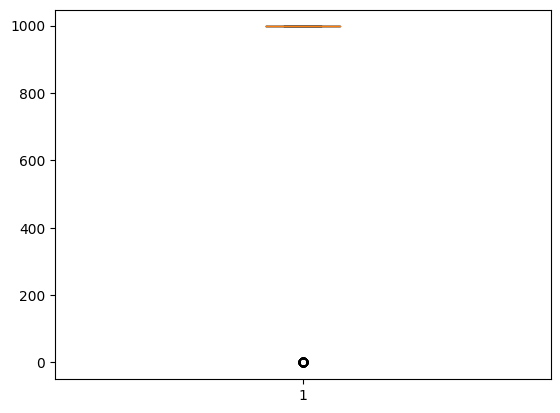

In [26]:
plt.boxplot(df['Industrial Category - A - Cultivators - Females'])
plt.show()

In [27]:
threshold = 1
# Calculate the mean of the column
mean_value = df['Industrial Category - B - Persons'].mean()
# Replace values greater than the threshold with the mean
df['Industrial Category - B - Persons'] = df['Industrial Category - B - Persons'].apply(lambda x: mean_value if x > threshold else x)

In [28]:
threshold = 1
# Calculate the mean of the column
mean_value = df['Industrial Category - B - Males'].mean()
# Replace values greater than the threshold with the mean
df['Industrial Category - B - Males'] = df['Industrial Category - B - Males'].apply(lambda x: mean_value if x > threshold else x)

In [29]:
threshold = 1
# Calculate the mean of the column
mean_value = df['Industrial Category - B - Females'].mean()
# Replace values greater than the threshold with the mean
df['Industrial Category - B - Females'] = df['Industrial Category - B - Females'].apply(lambda x: mean_value if x > threshold else x)

In [30]:
# Drop rows where a specific column meets a condition
df = df.drop(df[df['Age group'] == 'Total'].index)

# Drop rows based on multiple conditions
df = df.drop(df[(df['Age group'] == 'Age not stated')].index)
df = df.drop(df[df['Age group'] == '80+'].index)
df = df.drop(df[df['Age group'] == '`5-9'].index)
df = df.drop(df[df['Age group'] == '`10-14'].index)
print(df)

     Table Code State Code District Code            Area Name  \
3         B0706        `33          `000   State - TAMIL NADU   
4         B0706        `33          `000   State - TAMIL NADU   
5         B0706        `33          `000   State - TAMIL NADU   
6         B0706        `33          `000   State - TAMIL NADU   
7         B0706        `33          `000   State - TAMIL NADU   
...         ...        ...           ...                  ...   
1379      B0706        `33          `633  District - Tiruppur   
1380      B0706        `33          `633  District - Tiruppur   
1381      B0706        `33          `633  District - Tiruppur   
1382      B0706        `33          `633  District - Tiruppur   
1383      B0706        `33          `633  District - Tiruppur   

     Total/ Rural/ Urban Age group  \
3                  Total     15-19   
4                  Total     20-24   
5                  Total     25-29   
6                  Total     30-34   
7                  Total     

In [31]:
# Assuming you have a DataFrame named 'df' with columns 'Age', 'Industrial Category', and 'Sex'

# Calculate distribution of marginal workers by age
age_distribution = df['Age group'].value_counts()

# Calculate distribution of marginal workers by industrial category
industrial_distribution = df['Total/ Rural/ Urban'].value_counts()

# Calculate distribution of marginal workers by sex
district_distribution = df['District Code'].value_counts()


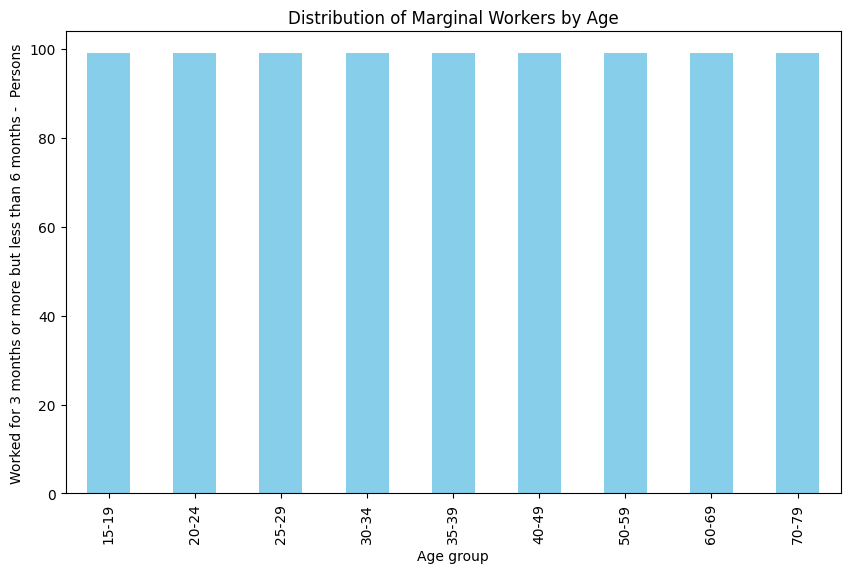

In [32]:
import matplotlib.pyplot as plt

# Plot age distribution
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Marginal Workers by Age')
plt.xlabel('Age group')
plt.ylabel('Worked for 3 months or more but less than 6 months -  Persons')
plt.show()



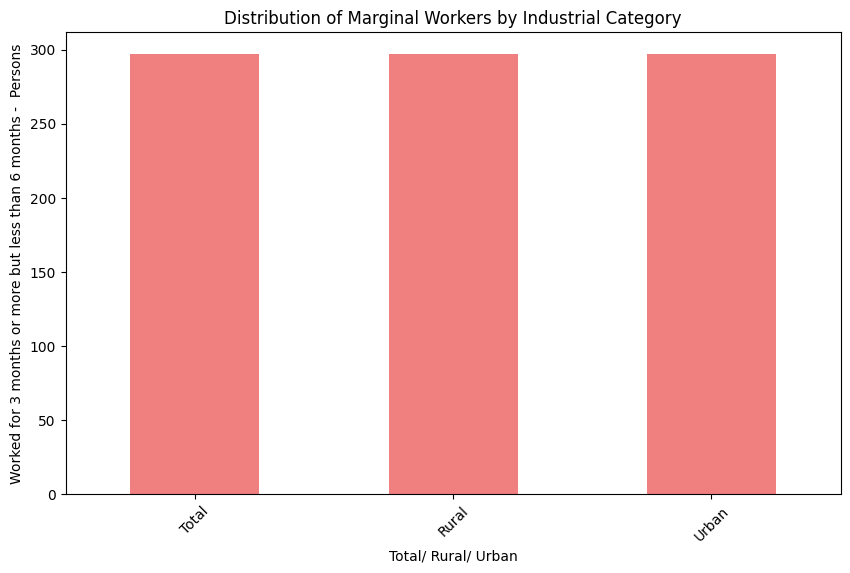

In [33]:
# Plot industrial category distribution
plt.figure(figsize=(10, 6))
industrial_distribution.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Marginal Workers by Industrial Category')
plt.xlabel('Total/ Rural/ Urban')
plt.ylabel('Worked for 3 months or more but less than 6 months -  Persons')
plt.xticks(rotation=45)
plt.show()

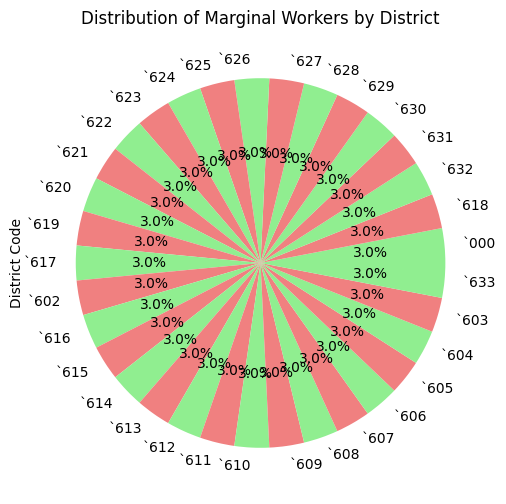

In [34]:
plt.figure(figsize=(8, 6))
district_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Marginal Workers by District')
plt.show()

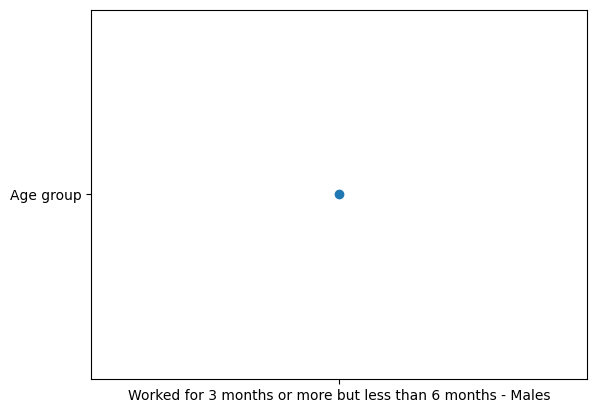

In [60]:
plt.scatter(x="Worked for 3 months or more but less than 6 months - Males",y='Age group')

In [49]:
x=df.iloc[:,[7,8]].values

In [52]:
kmeansmodel = KMeans(n_clusters = 2 , init = "k-means++",random_state=0)
y_kmeans = kmeansmodel.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


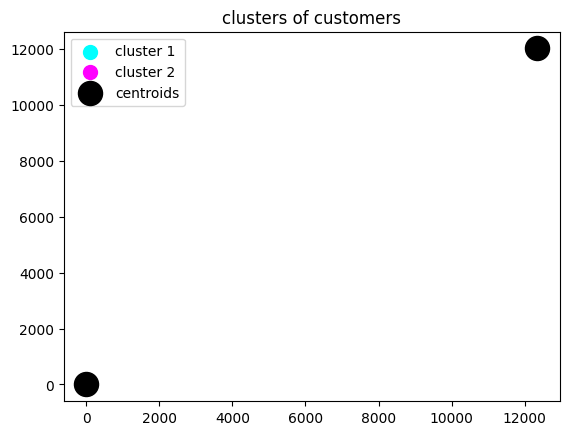

In [53]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c="cyan",label = "cluster 1")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c="magenta",label = "cluster 2")

plt.scatter(kmeansmodel.cluster_centers_[:,0],kmeansmodel.cluster_centers_[:,1],s=300,c="black",label="centroids")
plt.title("clusters of customers")
plt.legend()
plt.show()

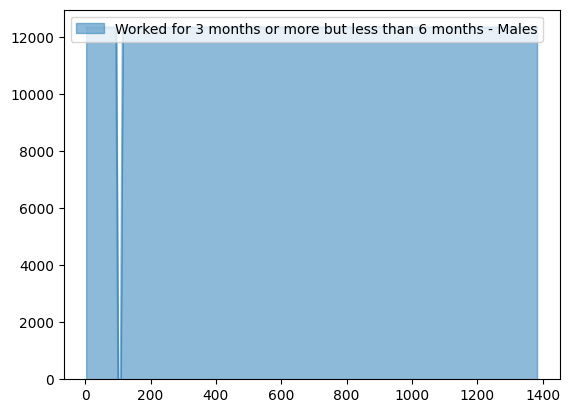

In [55]:
# Select the columns you want to create an area plot for
columns_to_plot = ['Age group', 'District Code','Worked for 3 months or more but less than 6 months - Males']

# Create the area plot using the selected columns
df.plot.area( y=columns_to_plot, alpha=0.5, stacked=False)


plt.legend(loc='upper left')

# Show the plot
plt.show()
